In [2]:
import pandas as pd

# Data Cleaning

In [4]:
df=pd.read_csv('../data/NABR_historic.csv')
df.head()

,long,lat,year,TimePeriod,RCP,scenario,treecanopy,Ann_Herb,Bare,Herb,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
0,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
1,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
2,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
3,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
4,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-12.45,0.113447,0.096831,0.041876,0.052298


In [5]:
df2 = pd.read_csv('../data/nearterm_data_2020-2024.csv')
df2.head()

,long,lat,year,TimePeriod,RCP,scenario,treecanopy,Ann_Herb,Bare,Herb,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
0,-110.0472,37.60413,2021,NT,4.5,sc22,0,0,84,5,...,6.37,1.630333,24.50402,24.50402,36.89,NaN,NaN,NaN,NaN,NaN
1,-110.0472,37.60413,2021,NT,4.5,sc22,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-12.77,0.114652,0.078764,0.043514,0.051281
2,-110.0472,37.60413,2021,NT,4.5,sc23,0,0,84,5,...,3.09,1.389056,24.11043,24.11043,37.95,NaN,NaN,NaN,NaN,NaN
3,-110.0472,37.60413,2021,NT,4.5,sc23,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-18.96,0.130221,0.096412,0.041232,0.092241
4,-110.0472,37.60413,2021,NT,4.5,sc24,0,0,84,5,...,6.87,-0.334389,25.54266,10.31321,37.74,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check for duplicates
num_duplicates_df = df.duplicated().sum()
num_duplicates_df2 = df2.duplicated().sum()
print(f"Number of duplicates in df: {num_duplicates_df}")
print(f"Number of duplicates in df2: {num_duplicates_df2}")


Number of duplicates in df: 0
Number of duplicates in df2: 10


In [7]:
# Remove duplicates from df2
df2 = df2.drop_duplicates()


In [8]:
# Check for missing values
df.isnull().sum()

long                                         0
lat                                          0
year                                         0
TimePeriod                                   0
RCP                                          0
scenario                                     0
treecanopy                                   0
Ann_Herb                                     0
Bare                                         0
Herb                                         0
Litter                                       0
Shrub                                        0
DrySoilDays_Summer_whole                  9345
Evap_Summer                               9345
ExtremeShortTermDryStress_Summer_whole    9345
FrostDays_Winter                          9345
NonDrySWA_Summer_whole                    9368
PPT_Winter                                4368
PPT_Summer                                4368
PPT_Annual                                5891
T_Winter                                  4368
T_Summer     

In [9]:
# Check for missing values
df2.isnull().sum()

long                                          0
lat                                           0
year                                          0
TimePeriod                                    0
RCP                                           0
scenario                                      0
treecanopy                                    0
Ann_Herb                                      0
Bare                                          0
Herb                                          0
Litter                                        0
Shrub                                         0
DrySoilDays_Summer_whole                  37519
Evap_Summer                               37519
ExtremeShortTermDryStress_Summer_whole    37525
FrostDays_Winter                          37519
NonDrySWA_Summer_whole                    37620
PPT_Winter                                17920
PPT_Summer                                17920
PPT_Annual                                23802
T_Winter                                

In [10]:
df.shape

(13821, 29)

In [11]:
df2.shape

(55792, 29)

In [12]:
# Combine the DataFrames
combined_df = pd.concat([df, df2], ignore_index=True)
combined_df.columns


Index(['long', 'lat', 'year', 'TimePeriod', 'RCP', 'scenario', 'treecanopy',
       'Ann_Herb', 'Bare', 'Herb', 'Litter', 'Shrub',
       'DrySoilDays_Summer_whole', 'Evap_Summer',
       'ExtremeShortTermDryStress_Summer_whole', 'FrostDays_Winter',
       'NonDrySWA_Summer_whole', 'PPT_Winter', 'PPT_Summer', 'PPT_Annual',
       'T_Winter', 'T_Summer', 'T_Annual', 'Tmax_Summer', 'Tmin_Winter',
       'VWC_Winter_whole', 'VWC_Spring_whole', 'VWC_Summer_whole',
       'VWC_Fall_whole'],
      dtype='object')

In [13]:
combined_df.isnull().sum()

long                                          0
lat                                           0
year                                          0
TimePeriod                                    0
RCP                                           0
scenario                                      0
treecanopy                                    0
Ann_Herb                                      0
Bare                                          0
Herb                                          0
Litter                                        0
Shrub                                         0
DrySoilDays_Summer_whole                  46864
Evap_Summer                               46864
ExtremeShortTermDryStress_Summer_whole    46870
FrostDays_Winter                          46864
NonDrySWA_Summer_whole                    46988
PPT_Winter                                22288
PPT_Summer                                22288
PPT_Annual                                29693
T_Winter                                

In [14]:
combined_df.shape

(69613, 29)

In [16]:
combined_df.to_csv('../data/combined_df.csv', index=False)

# EDA

## Descriptive Statistics

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
long,13821.0,-110.005518,0.022635,-1.100472e+02,-110.027300,-110.005000,-109.987800,-109.965900
lat,13821.0,37.608507,0.016206,3.757034e+01,37.598060,37.609150,37.622350,37.634760
year,13821.0,1998.889299,11.283303,1.980000e+03,1989.000000,1999.000000,2009.000000,2018.000000
treecanopy,13821.0,10.062586,8.855615,0.000000e+00,0.000000,9.000000,18.000000,29.000000
Ann_Herb,13821.0,0.228131,1.069702,0.000000e+00,0.000000,0.000000,0.000000,6.000000
Bare,13821.0,56.148976,18.418774,1.100000e+01,43.000000,54.000000,67.000000,94.000000
Herb,13821.0,9.553144,3.887177,1.000000e+00,8.000000,10.000000,11.000000,20.000000
Litter,13821.0,11.769626,6.112302,1.000000e+00,7.000000,10.000000,16.000000,26.000000
Shrub,13821.0,15.482454,8.594975,0.000000e+00,10.000000,15.000000,20.000000,46.000000
DrySoilDays_Summer_whole,4476.0,7.447274,20.763970,0.000000e+00,0.000000,0.000000,0.000000,89.000000


In [16]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
long,55792.0,-110.006322,0.022497,-1.100472e+02,-110.027300,-110.005700,-109.990900,-109.965900
lat,55792.0,37.608175,0.016188,3.757034e+01,37.598060,37.608620,37.621560,37.634760
year,55792.0,2022.499229,1.117450,2.021000e+03,2022.000000,2022.000000,2023.000000,2024.000000
RCP,55792.0,6.501075,2.000018,4.500000e+00,4.500000,8.500000,8.500000,8.500000
treecanopy,55792.0,9.671835,8.785271,0.000000e+00,0.000000,9.000000,18.000000,29.000000
Ann_Herb,55792.0,0.226108,1.063763,0.000000e+00,0.000000,0.000000,0.000000,6.000000
Bare,55792.0,56.633191,18.480740,1.100000e+01,45.000000,56.000000,67.000000,94.000000
Herb,55792.0,9.505951,3.891136,1.000000e+00,8.000000,10.000000,11.000000,20.000000
Litter,55792.0,11.735536,6.101472,1.000000e+00,8.000000,10.000000,16.000000,26.000000
Shrub,55792.0,15.346250,8.560316,0.000000e+00,10.000000,14.000000,20.000000,46.000000


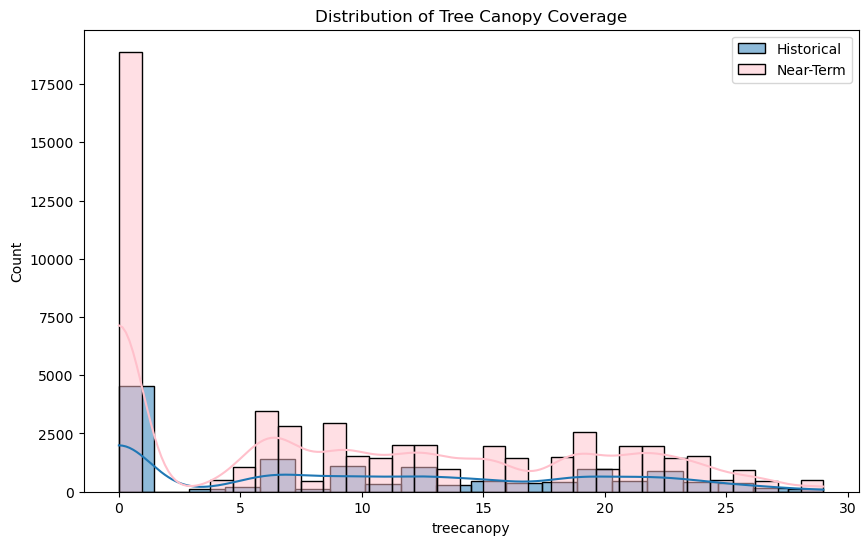

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df['treecanopy'], kde=True, label='Historical')
sns.histplot(df2['treecanopy'], kde=True, label='Near-Term', color='pink')
plt.title('Distribution of Tree Canopy Coverage')
plt.legend()
plt.show()


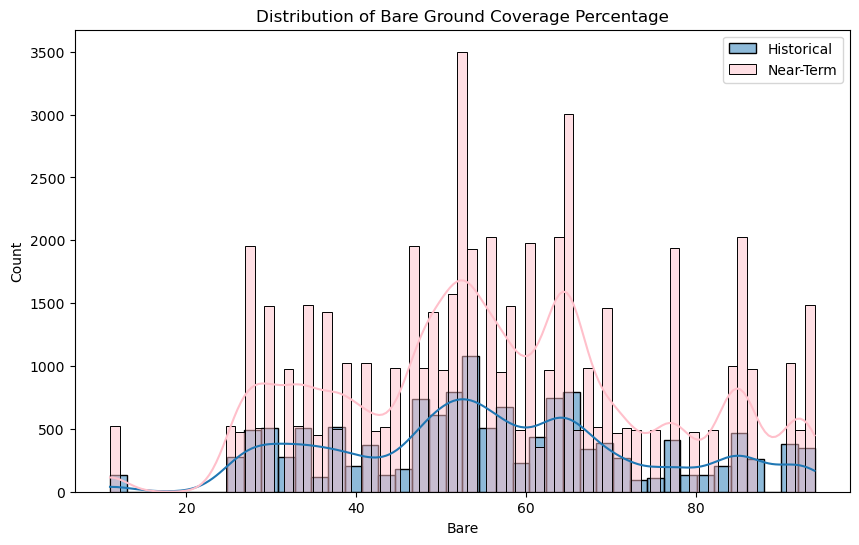

In [59]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Bare'], kde=True, label='Historical')
sns.histplot(df2['Bare'], kde=True, label='Near-Term', color='pink')
plt.title('Distribution of Bare Ground Coverage Percentage')
plt.legend()
plt.show()


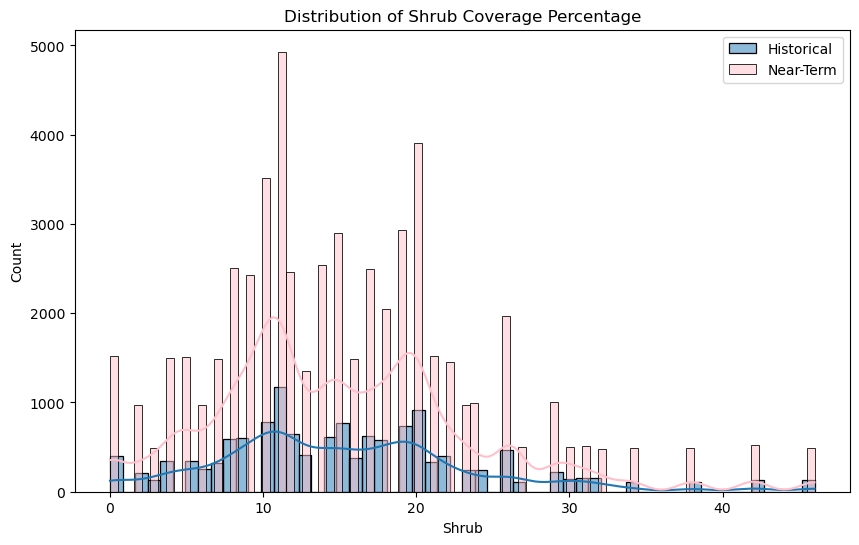

In [62]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Shrub'], kde=True, label='Historical')
sns.histplot(df2['Shrub'], kde=True, label='Near-Term', color='pink')
plt.title('Distribution of Shrub Coverage Percentage')
plt.legend()
plt.show()


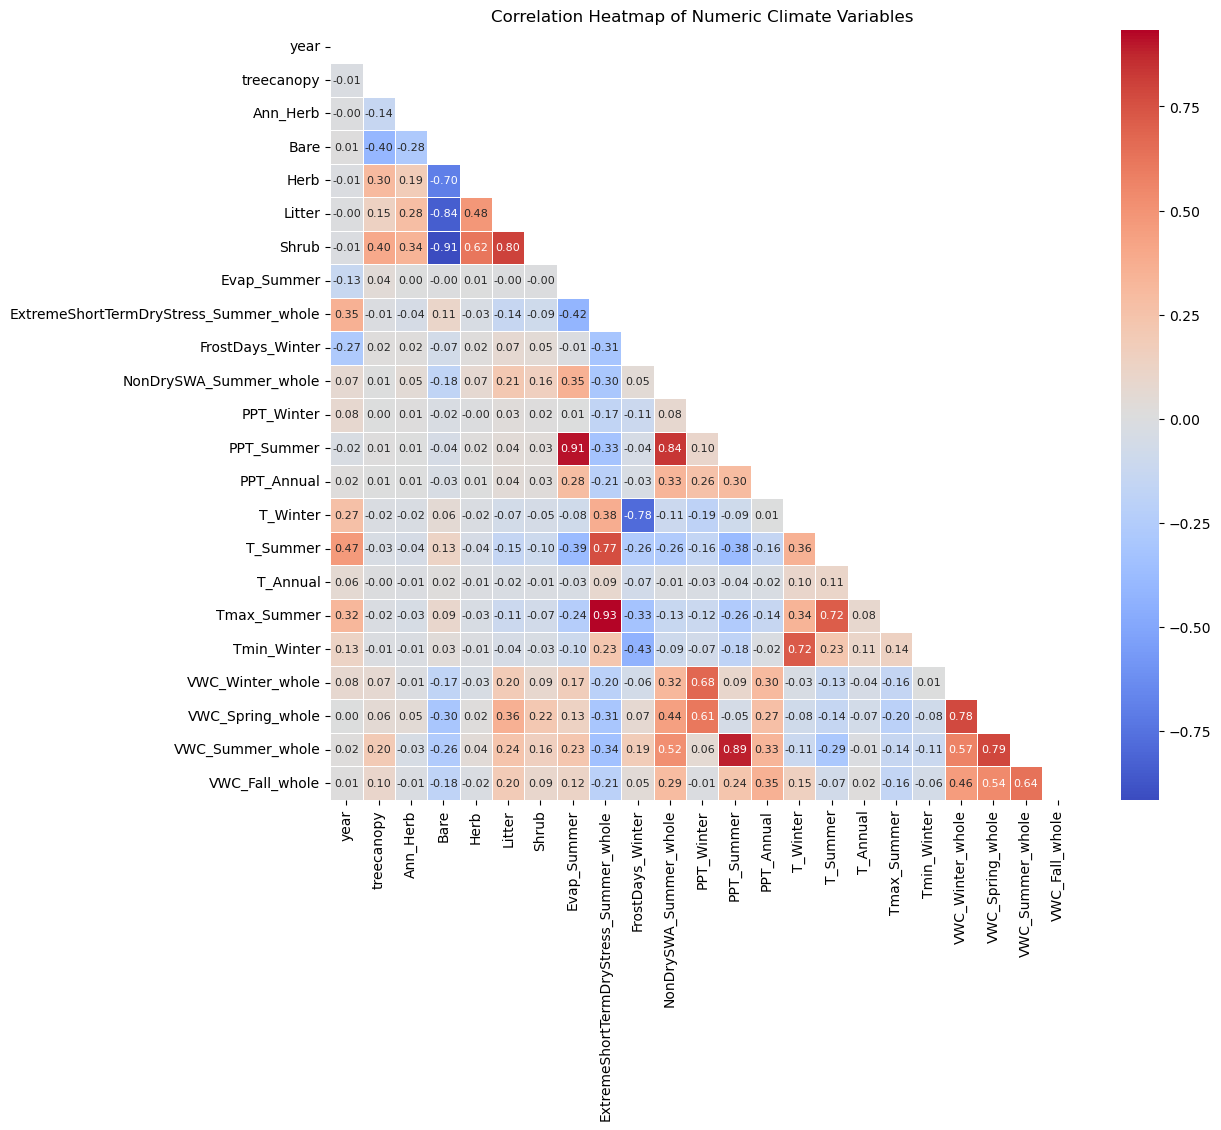

In [42]:
# Correlation matrix of numeric variables

numeric_vars = combined_df.select_dtypes(include=np.number).drop(columns=['lat', 'long', 'DrySoilDays_Summer_whole'])

corr_matrix = numeric_vars.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask, annot_kws={"size": 8})
plt.title('Correlation Heatmap of Numeric Climate Variables')
plt.show()



In [43]:
combined_df.columns

Index(['long', 'lat', 'year', 'TimePeriod', 'RCP', 'scenario', 'treecanopy',
       'Ann_Herb', 'Bare', 'Herb', 'Litter', 'Shrub',
       'DrySoilDays_Summer_whole', 'Evap_Summer',
       'ExtremeShortTermDryStress_Summer_whole', 'FrostDays_Winter',
       'NonDrySWA_Summer_whole', 'PPT_Winter', 'PPT_Summer', 'PPT_Annual',
       'T_Winter', 'T_Summer', 'T_Annual', 'Tmax_Summer', 'Tmin_Winter',
       'VWC_Winter_whole', 'VWC_Spring_whole', 'VWC_Summer_whole',
       'VWC_Fall_whole'],
      dtype='object')

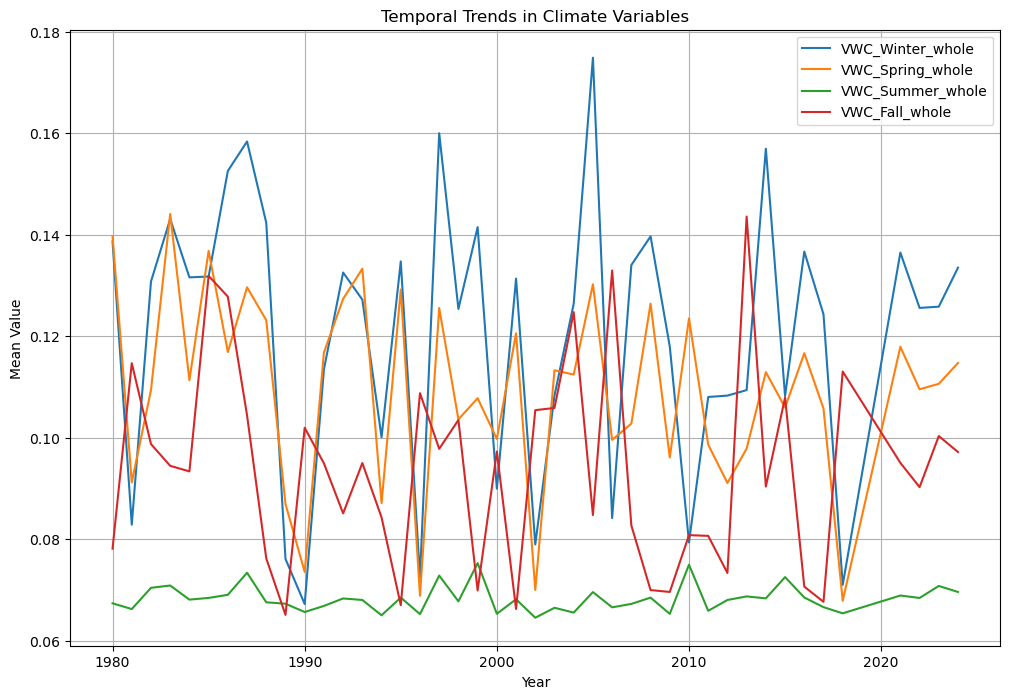

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combined_df' is your combined dataframe

# Select climate variables of interest
climate_vars = [
    'VWC_Winter_whole', 'VWC_Spring_whole', 'VWC_Summer_whole', 'VWC_Fall_whole'
]

# Group data by 'year' and calculate mean for each climate variable
annual_means = combined_df.groupby('year')[climate_vars].mean()

# Plot temporal trends for each climate variable
plt.figure(figsize=(12, 8))
for var in climate_vars:
    plt.plot(annual_means.index, annual_means[var], label=var)

plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Temporal Trends in Climate Variables')
plt.legend()
plt.grid(True)
plt.show()


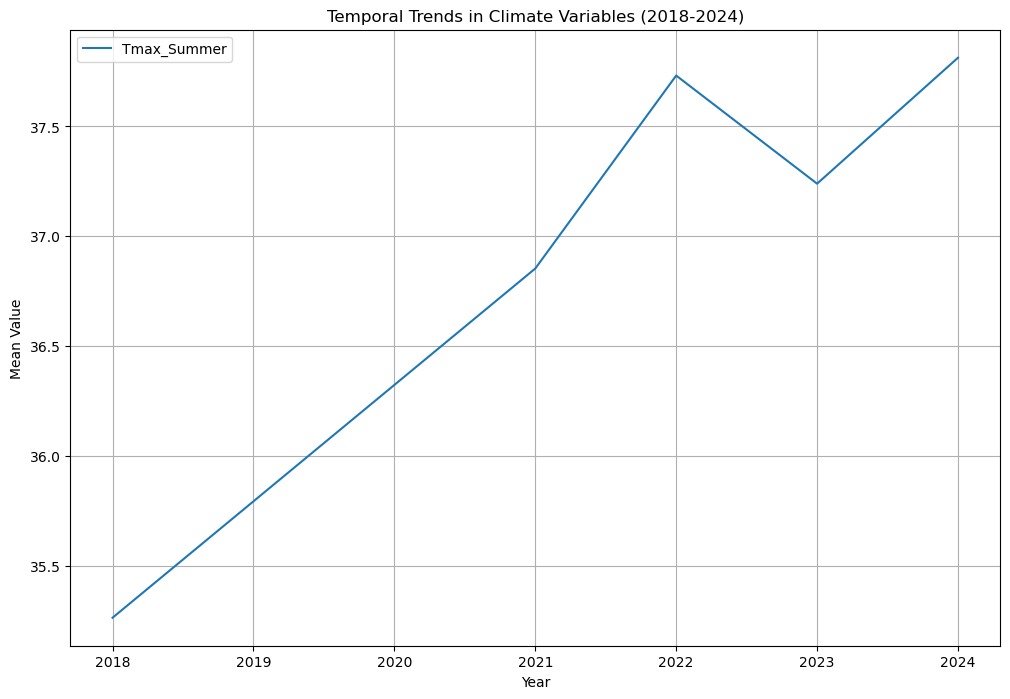

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combined_df' is your combined dataframe

# Filter data for the years 2020-2024
filtered_df = combined_df[(combined_df['year'] >= 2018) & (combined_df['year'] <= 2024)]

# Select climate variables of interest
climate_vars = [
    'Tmax_Summer'
]

# Group data by 'year' and calculate mean for each climate variable
annual_means = filtered_df.groupby('year')[climate_vars].mean()

# Plot temporal trends for each climate variable
plt.figure(figsize=(12, 8))
for var in climate_vars:
    plt.plot(annual_means.index, annual_means[var], label=var)

plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Temporal Trends in Climate Variables (2018-2024)')
plt.legend()
plt.grid(True)
plt.show()


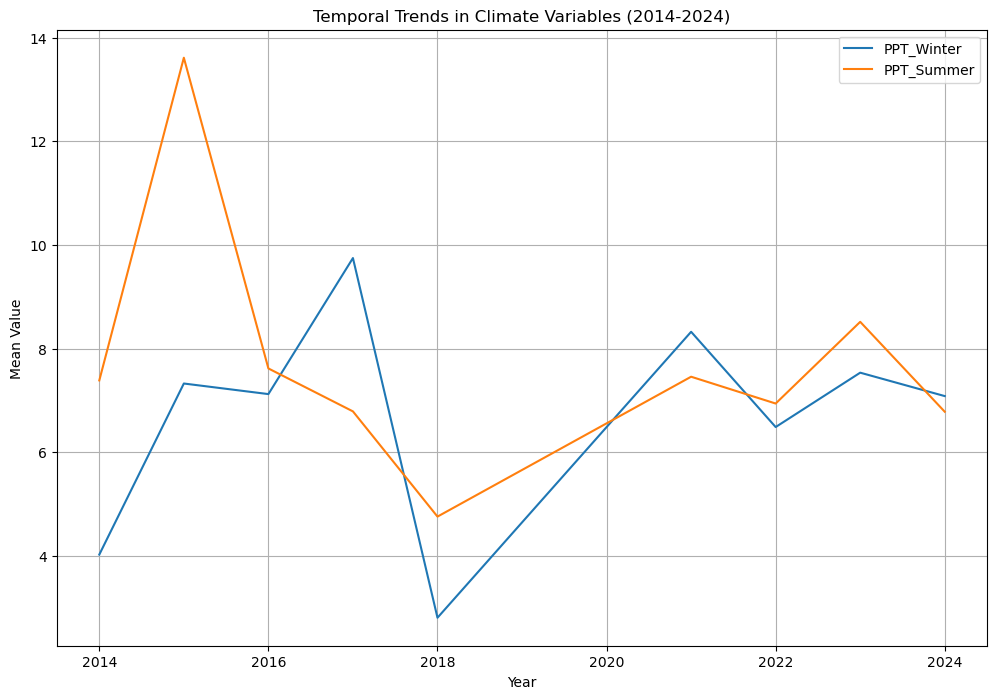

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combined_df' is your combined dataframe

# Filter data for the years 2020-2024
filtered_df = combined_df[(combined_df['year'] >= 2014) & (combined_df['year'] <= 2024)]

# Select climate variables of interest
climate_vars = [
    'PPT_Winter', 'PPT_Summer'
]

# Group data by 'year' and calculate mean for each climate variable
annual_means = filtered_df.groupby('year')[climate_vars].mean()

# Plot temporal trends for each climate variable
plt.figure(figsize=(12, 8))
for var in climate_vars:
    plt.plot(annual_means.index, annual_means[var], label=var)

plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Temporal Trends in Climate Variables (2014-2024)')
plt.legend()
plt.grid(True)
plt.show()


In [116]:
import plotly.graph_objects as go

# Define the custom color palette
color_palette = ["#00c0a7","#44546a","#ff6c00","#f89da6","#ffac01"]

# Group data by year and calculate mean, rounding to 2 decimals
temp_precip_data = combined_df[combined_df['year'] >= 2018].groupby('year')[['Tmax_Summer', 'PPT_Summer']].mean().round(2).reset_index()

# Create a new figure
fig = go.Figure()

# Add traces for max summer temperature and summer precipitation
fig.add_trace(go.Scatter(x=temp_precip_data['year'], y=temp_precip_data['Tmax_Summer'], 
                         mode='lines+markers', name='Max Summer Temperature', 
                         line=dict(color=color_palette[4])))
fig.add_trace(go.Scatter(x=temp_precip_data['year'], y=temp_precip_data['PPT_Summer'], 
                         mode='lines+markers', name='Summer Precipitation', 
                         yaxis='y2', line=dict(color=color_palette[0])))

# Update layout with secondary y-axis for precipitation and legend
fig.update_layout(
    title='Max Summer Temperature and Precipitation Over Years (2018-2024)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Max Summer Temperature (°C)'),
    yaxis2=dict(title='Summer Precipitation (mm)', overlaying='y', side='right'),
    legend=dict(x=0.1, y=0.9)
)

# Show the plot
fig.show()


In [104]:
# Filter for years 2018 and later
combined_df = combined_df[combined_df['year'] >= 2018]

# Round temperature and precipitation values
combined_df['Tmax_Summer'] = combined_df['Tmax_Summer'].round(2)
combined_df['PPT_Summer'] = combined_df['PPT_Summer'].round(2)

# Calculate correlations for the heatmap
correlations = combined_df[['Tmax_Summer', 'PPT_Summer', 'T_Annual', 'VWC_Summer_whole']].corr().round(2)

app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='heatmap'),
    dcc.Graph(id='line-chart'),
])

@app.callback(
    Output('line-chart', 'figure'),
    [Input('heatmap', 'clickData')]
)
def update_line_chart(clickData):
    if clickData:
        variable = clickData['points'][0]['x']
    else:
        variable = 'Tmax_Summer'  # Default variable

    # Filter data for the selected variable
    filtered_data = combined_df.groupby('year')[variable].mean().reset_index()

    fig_line_chart = px.line(filtered_data, x='year', y=variable, title=f'{variable} Over Years')

    return fig_line_chart


fig_heatmap = px.imshow(correlations, text_auto=True, aspect='auto', title='Correlation Heatmap')

app.run_server(debug=True)
